## WATERMARKS
In this notebook, two methods of watermarking have been discussed. First method shows watermarking without transparency which preserves the logo color and second method shows the other way. Logos with black background are easiest to use as watermarks. The ones with alpha channel too are equally convenient for the job. OpenCV already has various builtin functions that performs blending operation very swiftly. But at the end of the day, we can't really generalise which one to choose, it depends upon the users visual perception and convenience. 
### Learning Objective
**Learn the use of following function:**
 - addWeighted()
 - add()
 
**Learn the concept of:**
 - Masking
 - foreground and background extraction
 
 
Following are the logos and the image on which we want to blend them as watermarks.
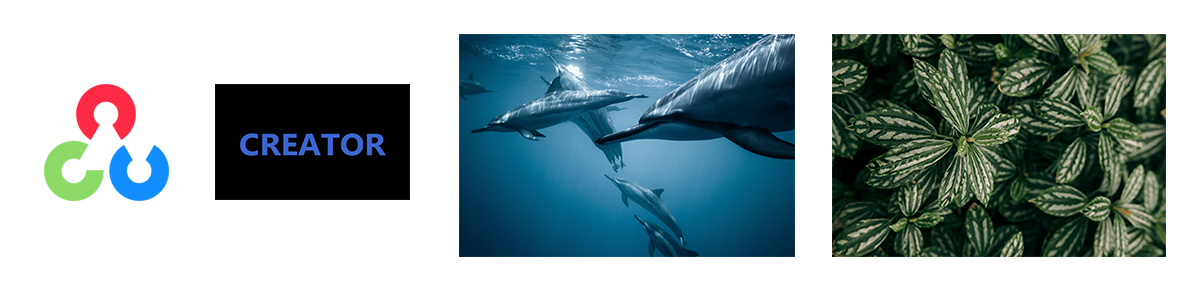

## Watermark Method 1
This method works well with logos with both white and black backgrounds. Except this does not provide transparency effect. Here, we are going to learn how to use `bitwise_and()`, `bitwise_not()`, and `add()` function to carry out the operation.
#### Workflow
 - Extract the foreground and background masks of the logo
 - Find ROI
 - Perform `bitwise_and()` on foreground mask and ROI
 - Perform `bitwise_and()` on background mak and the original logo 
 - Use `add()` to combine the logo foreground on the ROI background
 - Insert the combined patch in the image

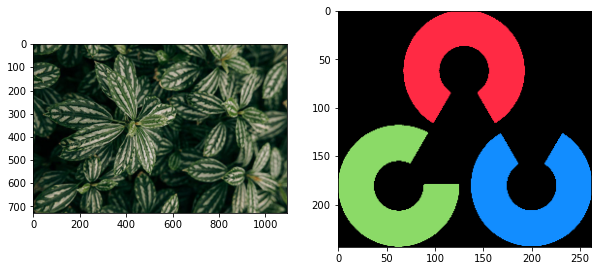

In [44]:
# Load image and logo
img = cv2.imread('pexels.jpg')
logo = opencv_logo_resized.copy()
plt.figure(figsize=(10,10))

# retrieve the image and logo shape
img_h, img_w, _ = img.shape
logo_h, logo_w, _ = logo.shape

# Display
plt.subplot(121); plt.imshow(img[:,:,::-1]);
plt.subplot(122); plt.imshow(logo[:,:,::-1]);

## Get ROI

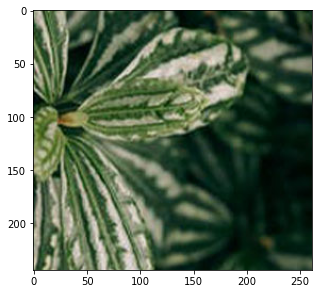

In [39]:
# Cx and Cy are centre of the image
cx = int(img_w/2)
cy = int(img_h/2)

# tlc : top left corner
tlc_x = int(cx - logo_w/2)
tlc_y = int(cy - logo_h/2)

# brc : bottom right corner
brc_x = int(cx + logo_w/2)
brc_y = int(cy + logo_h/2)

# Get region of interest
roi = img2[tlc_y:brc_y, tlc_x:brc_x]

# display
plt.figure(figsize=(5,5))
plt.imshow(roi[:,:,::-1])

## Extract Masks
### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`bitwise_not()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga0002cf8b418479f4cb49a75442baee2f)


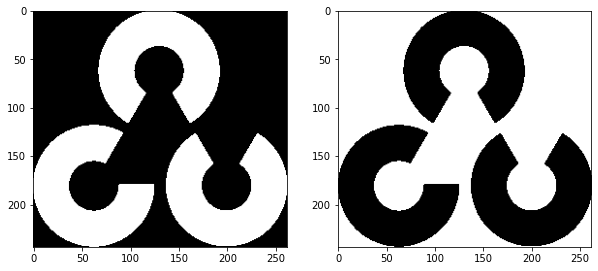

In [31]:
# Convert logo to gray scale
opencv_gray = cv2.cvtColor(logo,cv2.COLOR_BGR2GRAY)

# Apply threholding to extract mask
ret,mask = cv2.threshold(opencv_gray,10,255,cv2.THRESH_BINARY)

# Invert the mask
mask_inv = cv2.bitwise_not(mask)

# Display
plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(mask);
plt.subplot(122); plt.imshow(mask_inv);


## Set up ROI background and Logo foreground
### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst	=	cv2.bitwise_and( src1, src2[, dst[, mask]] ) 
```
`dst`: Is the output image of the same size and depth as `src1` and `src2`.

The function has **3 required arguments**:

1. `src1`: first input array or a scalar.
2. `src2`: second input array or a scalar.
3. `dst`: output array that has the same size and type as the input array(s)

The function has **1 optional argument**:
1. `mask`: optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.


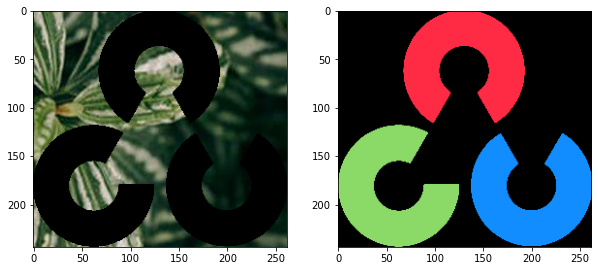

In [45]:
bg = cv2.bitwise_and(roi, roi, mask = mask_inv)
fg = cv2.bitwise_and(logo, logo, mask = mask)

# Display
plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(bg[:,:,::-1]);
plt.subplot(122); plt.imshow(fg[:,:,::-1]);


### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst	=	cv2.add(src1, src2[, dst[, mask[, dtype]]])
```
`dst`: Is the output image of the same size and depth as `src1` and `src2`.

The function has **3 required arguments**:

1. `src1`: first input array or a scalar.
2. `src2`: second input array or a scalar.
3. `dst`: output array that has the same size and number of channels as the input array(s); the depth is defined by dtype or src1/src2.

The function has **2 optional argument**:
1. `mask`: optional operation mask - 8-bit single channel array, that specifies elements of the output array to be changed.
2. `dtype`: optional depth of the output array (see the discussion below).


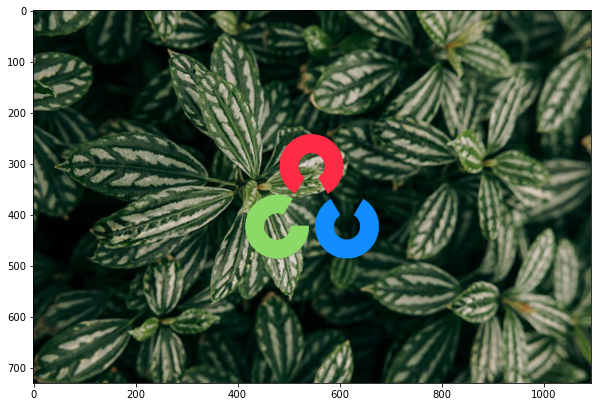

In [41]:
# Add the foreground and background
patch = cv2.add(fg,bg)

# Insert the patch in the image
img[tlc_y:brc_y, tlc_x:brc_x] = patch

# Display
plt.figure(figsize=(10,10))
plt.imshow(img[:,:,::-1])

## Watermarking Method 2
Now that we know how to make straight forward watermark, let's take a look at another mathod which provides transparency effect.
#### Workflow
1. Resize the image to a suitable size if required
2. Check height and width of logo
3. Get ROI from image according to height and width of the logo
4. Perform `addWeighted()` operation

## Import Libraries


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = (15,15)

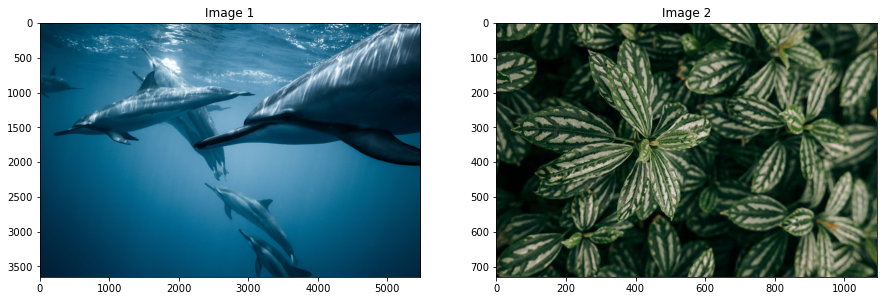

In [2]:
# Load Image
img1 =cv2.imread('image.jpg')
img2 = cv2.imread('pexels.jpg')

plt.subplot(121); plt.imshow(img1[:,:,::-1]); plt.title('Image 1');
plt.subplot(122); plt.imshow(img2[:,:,::-1]); plt.title('Image 2');


In [3]:
# Check dimension of images
print('Image 1 Height x Width : ', img1.shape[0] , 'x', img1.shape[1])
print('Image 2 Height x Width : ', img2.shape[0] , 'x', img2.shape[1])

Image 1 Height x Width :  3648 x 5472
Image 2 Height x Width :  730 x 1094


### Too Large?
Image 1 is a bit larger than image 2. Let us resize it to make the sizes equal. In our case reducing by a factor of 5 does the job.
### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`resize()`**](https://docs.opencv.org/4.5.2/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d)

In [4]:
# resize
resized_img1 = cv2.resize(img1, None, fx= 0.2, fy= 0.2, interpolation= cv2.INTER_LINEAR)

print("Image 1 size after resizing : ", resized_img1.shape)
print("Image 2 size : ", img2.shape)

# retrieve the image shape
img_h, img_w, _ = resized_img1.shape


Image 1 size after resizing :  (730, 1094, 3)
Image 2 size :  (730, 1094, 3)


OpenCV logo size :  (2436, 2623, 3)
Creator logo size :  (210, 350, 3)


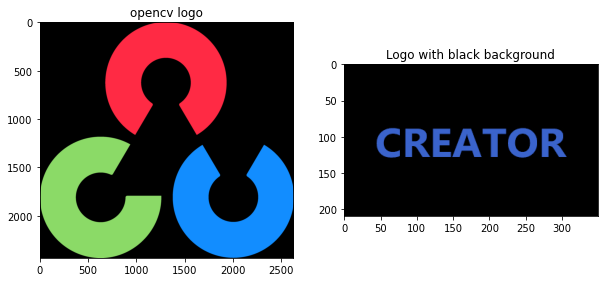

In [5]:
# Load logos
opencv_logo = cv2.imread('OpenCV.png')
logo_black = cv2.imread('logo_black.jpg')

print("OpenCV logo size : ",opencv_logo.shape)
print("Creator logo size : ", logo_black.shape)

# Display
plt.figure(figsize=(10,10))
plt.subplot(121);plt.imshow(opencv_logo[:,:,::-1]);plt.title('opencv logo');
plt.subplot(122);plt.imshow(logo_black[:,:,::-1]);plt.title('Logo with black background');


## Resize OpenCV Logo

In [6]:
# resize opencv logo
opencv_logo_resized = cv2.resize(opencv_logo, None, fx= 0.1, fy= 0.1, interpolation= cv2.INTER_LINEAR )

# Chck logo shapes
print("OpenCV Logo shape after resizing : ", opencv_logo_resized.shape)
print("Logo with black background : ", logo_black.shape)

# get logo shapes
logo_h1, logo_w1, _ = opencv_logo_resized.shape
logo_h2, logo_w2, _ = logo_black.shape

OpenCV Logo shape after resizing :  (244, 262, 3)
Logo with black background :  (210, 350, 3)


### Get ROI of images
Well the ROI or region of interest is the area on which we are going to superimpose the logo. We are going to place the logos in the center of left half and right half of first images. Following illustration provides a rough idea. Once we calculate the coordinates for first image, we don't need to do it for the second image as the dimensions are exact.<br>
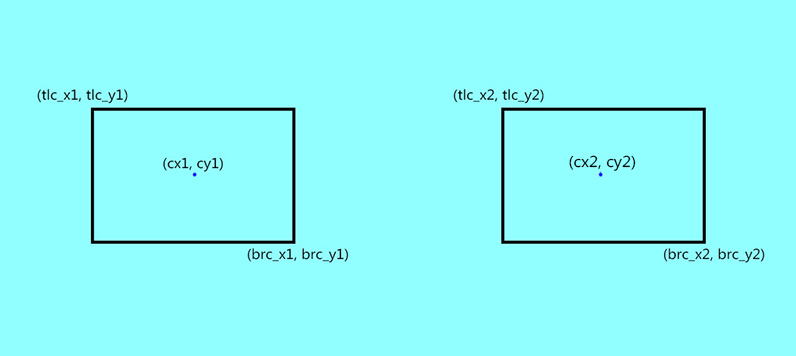
<br>

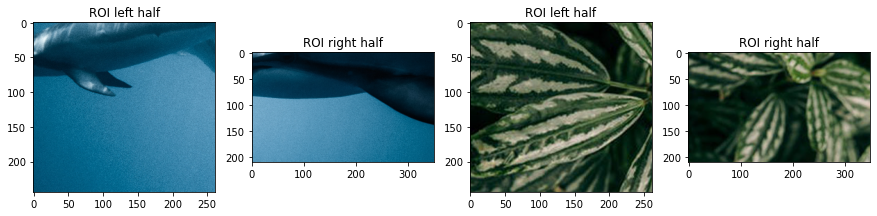

In [7]:
# Cx1 and Cy1 are centre of the left half
cx1 = int(img_w/4)
cy1 = int(img_h/2)

# tlc : top left corner
tlc_x1 = int(cx1 - logo_w1/2)
tlc_y1 = int(cy1 - logo_h1/2)

# brc : bottom right corner
brc_x1 = int(cx1 + logo_w1/2)
brc_y1 = int(cy1 + logo_h1/2)

# Cx2 and Cy2 are centre of the right half
cx2 = int((3/4)*img_w)
cy2 = int(img_h/2)

# tlc : top left corner
tlc_x2 = int(cx2 - logo_w2/2)
tlc_y2 = int(cy2 - logo_h2/2)

# brc : bottom right corner
brc_x2 = int(cx2 + logo_w2/2)
brc_y2 = int(cy2 + logo_h2/2)

# Get region of interest, Image 1
roi1 = resized_img1[tlc_y1:brc_y1, tlc_x1:brc_x1]
roi2 = resized_img1[tlc_y2:brc_y2, tlc_x2:brc_x2]

# Get region of interest, Image 2
roi3 = img2[tlc_y1:brc_y1, tlc_x1:brc_x1]
roi4 = img2[tlc_y2:brc_y2, tlc_x2:brc_x2]

# display
plt.figure(figsize=(15,15))
plt.subplot(141); plt.imshow(roi1[:,:,::-1]); plt.title('ROI left half');
plt.subplot(142); plt.imshow(roi2[:,:,::-1]); plt.title('ROI right half');
plt.subplot(143); plt.imshow(roi3[:,:,::-1]); plt.title('ROI left half');
plt.subplot(144); plt.imshow(roi4[:,:,::-1]); plt.title('ROI right half');

## Superimpose
We are using `addWeighted()` function to put the watermarks. You can play with the values of alpha and beta to generate different results.
### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst	=	cv2.addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]]	)
```
`dst`: Is the output image of the same size and depth as `src1` and `src2`.

The function has **5 required arguments**:

1. `src`: first input array.
2. `alpha`: weight of the first array elements.
3. `src2`:	second input array.
4. `beta`: weight of the second array elements.
5. `gamma`: scalar added to each sum.

The function has **1 optional argument**:
1. `dtype` : optional depth of the output array; when both input arrays have the same depth, dtype can be set to -1, which will be equivalent to `src1.depth()`.


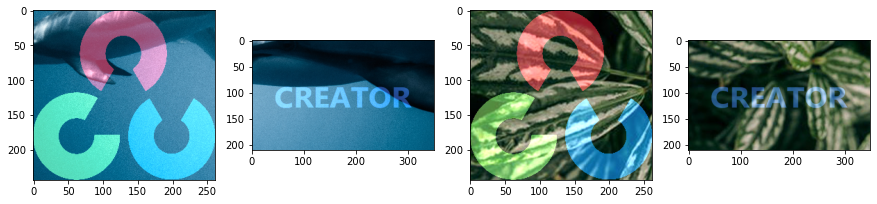

In [8]:
# Blend ROi and Logos
watermarked_1 = cv2.addWeighted(roi1, 1, opencv_logo_resized, 0.6, 0)
watermarked_2 = cv2.addWeighted(roi2, 1, logo_black, 0.6, 0)
watermarked_3 = cv2.addWeighted(roi3, 1, opencv_logo_resized, 0.6, 0)
watermarked_4 = cv2.addWeighted(roi4, 1, logo_black, 0.6, 0)

# display
plt.figure(figsize=(15,15))
plt.subplot(141); plt.imshow(watermarked_1[:,:,::-1]);
plt.subplot(142); plt.imshow(watermarked_2[:,:,::-1]);
plt.subplot(143); plt.imshow(watermarked_3[:,:,::-1]);
plt.subplot(144); plt.imshow(watermarked_4[:,:,::-1]);


## Done
Now we just need to replace watermarked patch in the original images.

True

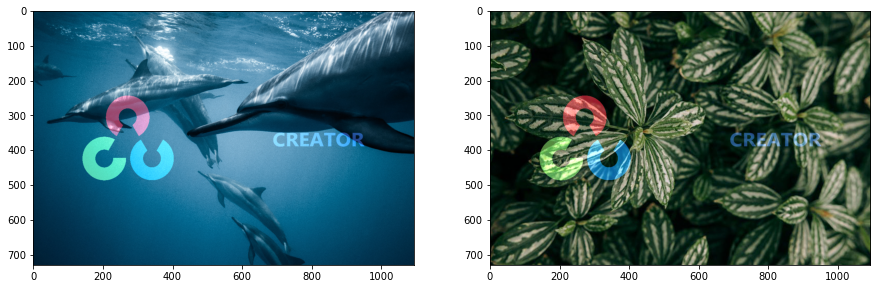

In [9]:
# Insert the watermarked patch in the image
resized_img1[tlc_y1:brc_y1, tlc_x1:brc_x1] = watermarked_1
resized_img1[tlc_y2:brc_y2, tlc_x2:brc_x2] = watermarked_2
img2[tlc_y1:brc_y1, tlc_x1:brc_x1] = watermarked_3
img2[tlc_y2:brc_y2, tlc_x2:brc_x2] = watermarked_4

# display
plt.figure(figsize=(15,15))
plt.subplot(121);plt.imshow(resized_img1[:,:,::-1]);
plt.subplot(122);plt.imshow(img2[:,:,::-1]);

# write to disk
cv2.imwrite('watermarked_1.jpg',resized_img1)
cv2.imwrite('watermarked_2.jpg',img2)

## Conclusion
So we have seen different methods to apply watermark to images. Both methods have their advantages and disadvantages. Finally, it's really upto the users which function to use.